In [6]:
# Random Forest Classification
import pandas as pd
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

In [7]:
fraud_data = pd.read_csv("Fraud_check.csv")

In [8]:
fraud_data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [9]:
fraud_data.shape

(600, 6)

In [10]:
fraud_data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

In [11]:
fraud_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [12]:
fraud_data.columns

Index(['Undergrad', 'Marital.Status', 'Taxable.Income', 'City.Population',
       'Work.Experience', 'Urban'],
      dtype='object')

In [13]:
fraud_data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [14]:
fraud_data = fraud_data.rename(columns={
    'Marital.Status': 'Marital_Status',
    'Taxable.Income': 'Taxable_Income',
    'City.Population': 'City_Population',
    'Work.Experience': 'Work_Experience'
})

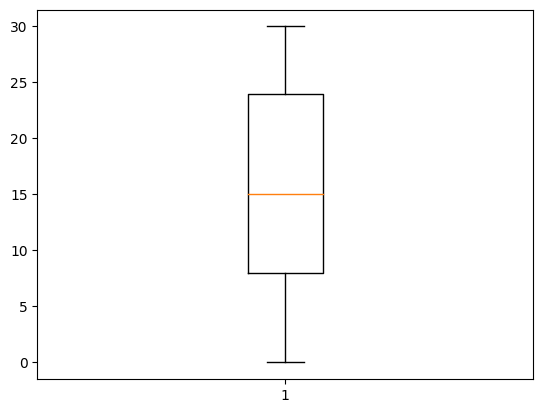

In [15]:
import numpy as np
import matplotlib.pyplot as plt


plt.boxplot(fraud_data.Work_Experience)
plt.show()

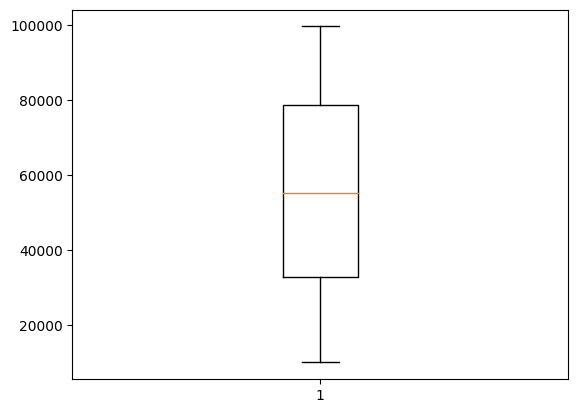

In [16]:
plt.boxplot(fraud_data.Taxable_Income)
plt.show()

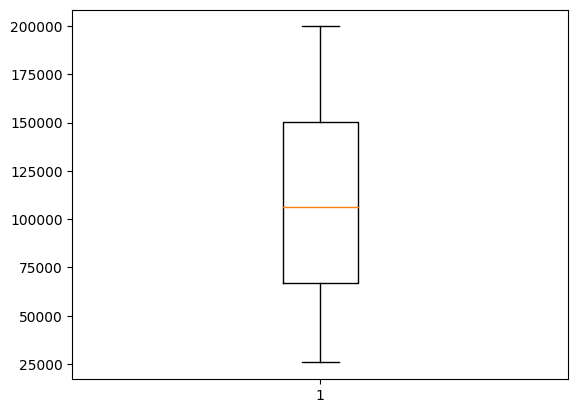

In [17]:
plt.boxplot(fraud_data.City_Population)
plt.show()

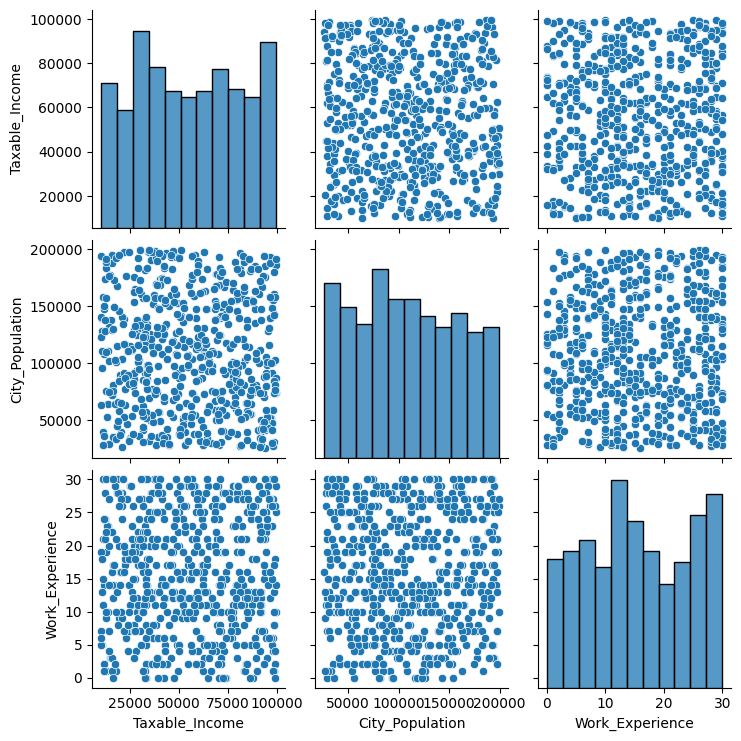

In [18]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Pair plot
sns.pairplot(fraud_data)
plt.show()

In [19]:
fraud_data['Taxable_Income'] =fraud_data['Taxable_Income'].apply(lambda x: 0 if x <= 30000 else 1)

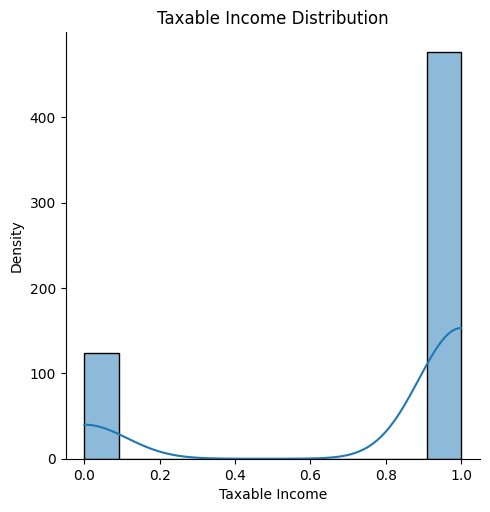

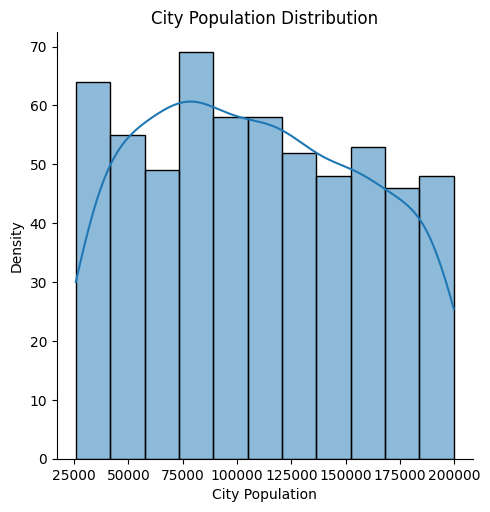

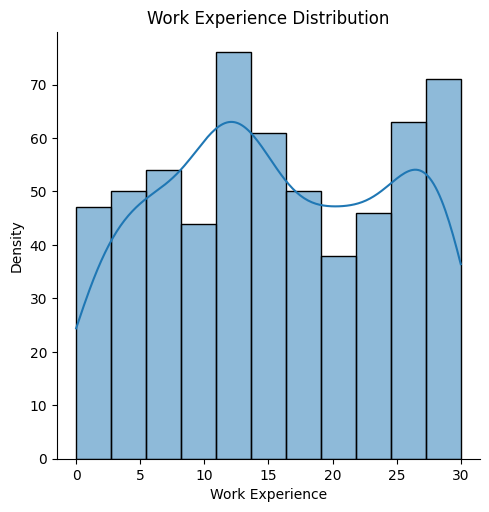

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data' is your DataFrame containing the dataset
# Extracting the variables
taxable_income = fraud_data['Taxable_Income']
city_population = fraud_data['City_Population']
work_experience = fraud_data['Work_Experience']

# Plotting the distributions using displot
sns.displot(taxable_income, kde=True)
plt.title('Taxable Income Distribution')
plt.xlabel('Taxable Income')
plt.ylabel('Density')
plt.show()

sns.displot(city_population, kde=True)
plt.title('City Population Distribution')
plt.xlabel('City Population')
plt.ylabel('Density')
plt.show()

sns.displot(work_experience, kde=True)
plt.title('Work Experience Distribution')
plt.xlabel('Work Experience')
plt.ylabel('Density')
plt.show()


In [20]:
fraud_data.head()

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,1,50047,10,YES
1,YES,Divorced,1,134075,18,YES
2,NO,Married,1,160205,30,YES
3,YES,Single,1,193264,15,YES
4,NO,Married,1,27533,28,NO


In [21]:
fraud_data['Marital_Status'].unique()

array(['Single', 'Divorced', 'Married'], dtype=object)

In [22]:
fraud_data = pd.get_dummies(fraud_data, columns=['Undergrad','Marital_Status','Urban'])

In [23]:
fraud_data.head()

,Taxable_Income,City_Population,Work_Experience,Undergrad_NO,Undergrad_YES,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Urban_NO,Urban_YES
0,1,50047,10,True,False,False,False,True,False,True
1,1,134075,18,False,True,True,False,False,False,True
2,1,160205,30,True,False,False,True,False,False,True
3,1,193264,15,False,True,False,False,True,False,True
4,1,27533,28,True,False,False,True,False,True,False


<Axes: xlabel='Taxable_Income', ylabel='count'>

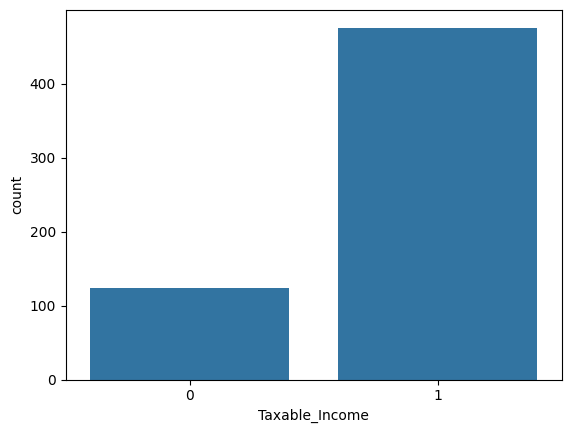

In [24]:
# Create countplot
sns.countplot(x='Taxable_Income', data=fraud_data)

In [25]:
# Split data into features and target variable
x = fraud_data.drop(columns=['Taxable_Income'])
y =fraud_data['Taxable_Income']

In [59]:
num_trees = 80
max_features = 4
kfold = KFold(n_splits=3, random_state=42, shuffle = True)
model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features, random_state=42)
results = cross_val_score(model, x, y, cv=kfold)
print(results.mean())

0.7433333333333333


In [58]:
import lightgbm as lgb
from sklearn.model_selection import KFold, cross_val_score

# Define parameters
params = {
    'boosting_type': 'gbdt',
    'objective': 'binary',
    'metric': 'accuracy',  # Change the metric as needed
    'num_leaves': 25,
    'learning_rate': 0.05,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

# Define number of trees and max features
num_trees = 80
max_features = 4

# Define k-fold cross-validation
kfold = KFold(n_splits=4, random_state=42, shuffle=True)

# Initialize LGBM model
model = lgb.LGBMClassifier(n_estimators=num_trees, max_features=max_features, **params)

# Perform cross-validation
results = cross_val_score(model, x, y, cv=kfold)

# Print mean accuracy
print(results.mean())


[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] Unknown parameter: max_features
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with po

In [57]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score

# Define parameters
params = {
    'booster': 'gbtree',
    'objective': 'binary:logistic',
    'eval_metric': 'error',  # Change the metric as needed
    'max_depth': 4,
    'learning_rate': 0.1,
    'subsample': 0.8,
    'colsample_bytree': 0.8,
}

# Define number of trees and max features
num_trees = 80
max_features = 4

# Define k-fold cross-validation
kfold = KFold(n_splits=3, random_state=42, shuffle=True)

# Initialize XGB model
model = xgb.XGBClassifier(n_estimators=num_trees, max_features=max_features, **params)

# Perform cross-validation
results = cross_val_score(model, x, y, cv=kfold)

# Print mean accuracy
print(results.mean())


0.7716666666666666
